In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

olympic_df = pd.read_csv('athlete_events.csv')

In [2]:
olympic_df.dtypes

ID          int64
Name       object
Sex        object
Age       float64
Height    float64
Weight    float64
Team       object
NOC        object
Games      object
Year        int64
Season     object
City       object
Sport      object
Event      object
Medal      object
dtype: object

In [3]:
olympic_df.sort_values(by='Year', ascending=False)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
89007,45126,Hemza Haloui,M,22.0,180.0,96.0,Algeria,ALG,2016 Summer,2016,Summer,Rio de Janeiro,Wrestling,"Wrestling Men's Heavyweight, Greco-Roman",NaN
235174,117924,Masanao Takahashi,M,34.0,170.0,65.0,Japan,JPN,2016 Summer,2016,Summer,Rio de Janeiro,Equestrianism,"Equestrianism Mixed Dressage, Team",NaN
55010,28193,Clio Emilson Ucha Dias,M,23.0,192.0,90.0,Portugal,POR,2016 Summer,2016,Summer,Rio de Janeiro,Judo,Judo Men's Middleweight,NaN
158762,79712,Martyna Mikoajczak,F,25.0,176.0,57.0,Poland,POL,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Women's Lightweight Double Sculls,NaN
158763,79713,Artur Mikoajczewski,M,26.0,180.0,73.0,Poland,POL,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Lightweight Double Sculls,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23918,12563,Conrad Helmut Fritz Bcker,M,25.0,NaN,NaN,Germany,GER,1896 Summer,1896,Summer,Athina,Gymnastics,Gymnastics Men's Pommelled Horse,NaN
160372,80474,Ioannis Mitropoulos,M,NaN,NaN,NaN,Greece,GRE,1896 Summer,1896,Summer,Athina,Gymnastics,Gymnastics Men's Rings,Gold
160371,80474,Ioannis Mitropoulos,M,NaN,NaN,NaN,Greece,GRE,1896 Summer,1896,Summer,Athina,Gymnastics,Gymnastics Men's Parallel Bars,NaN
181561,91250,Georgios Saranti Papasideris,M,NaN,NaN,NaN,Greece,GRE,1896 Summer,1896,Summer,Athina,Athletics,Athletics Men's Discus Throw,NaN


In [4]:
display(olympic_df['Team'].nunique())
display(olympic_df['NOC'].nunique())
display(olympic_df['NOC'].value_counts())


1184

230

NOC
USA    18853
FRA    12758
GBR    12256
ITA    10715
GER     9830
       ...  
YMD        5
SSD        3
NBO        2
UNK        2
NFL        1
Name: count, Length: 230, dtype: int64

In [5]:
olympic_df['Sport'].nunique()

66

In [12]:
olympic_df['Medal'].value_counts()

Medal
Gold      13372
Bronze    13295
Silver    13116
Name: count, dtype: int64

In [33]:
olympic_df['Age'].describe()
olympic_df['Sport'].isin(['Equestrianism']).value_counts()


Sport
False    264772
True       6344
Name: count, dtype: int64

Text(0.5, 1.0, 'Könsfördelning i OS')

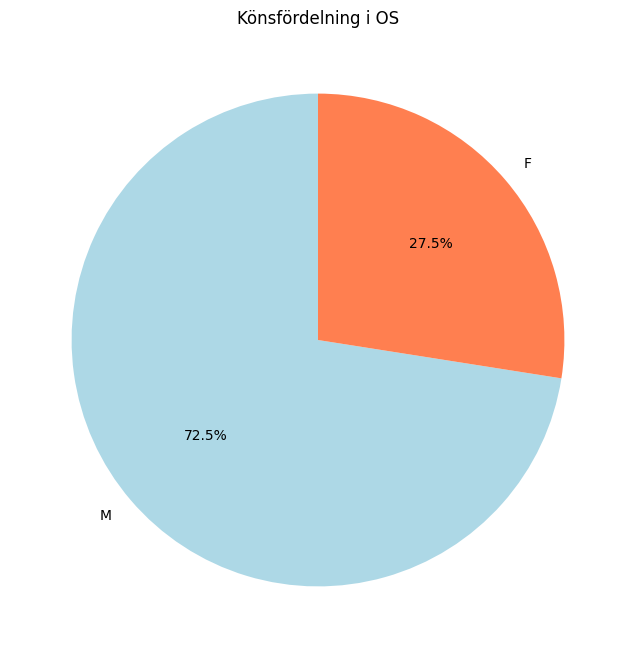

In [8]:
Sex_counts = olympic_df['Sex'].value_counts()

plt.figure(figsize=(12,8))

plt.pie(Sex_counts, labels = Sex_counts.index, startangle=90, autopct='%1.1f%%', colors = ['lightblue', 'coral'])
plt.title('Könsfördelning i OS')

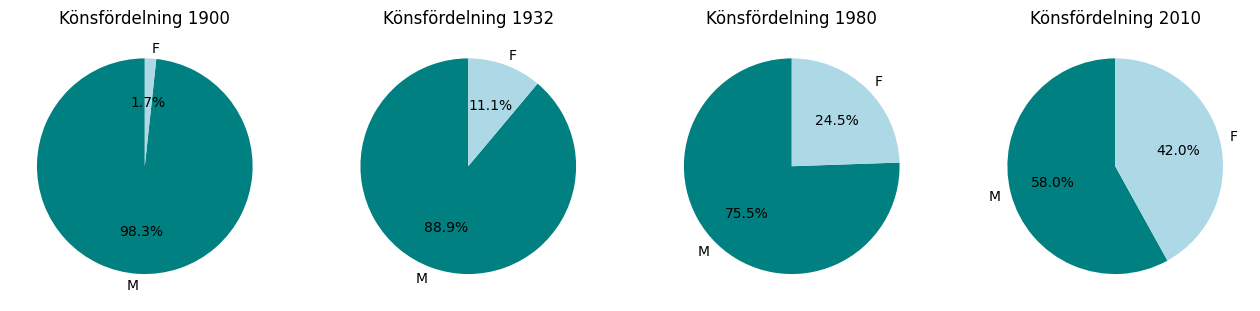

In [9]:
years = [1900, 1932, 1980, 2010]

fig, ax = plt.subplots(1, len(years), figsize=(16, 5))

for i, year in enumerate(years):
    data = olympic_df[olympic_df['Year'] == year]['Sex'].value_counts()
    # data = data.reindex(['M', 'F'], fill_value=0)
    ax[i].pie(data, labels = data.index, autopct = '%1.1f%%', startangle=90, colors = ['teal', 'lightblue'])
    ax[i].set_title(f'Könsfördelning {year}')

In [10]:
import plotly_express as px

years_with_genders= olympic_df.groupby(['Year', 'Sex'])['Name'].count().unstack(fill_value=0)
years_with_genders['Total'] = years_with_genders['F'] + years_with_genders['M']
years_with_genders['F.Perc'] = years_with_genders['F'] / years_with_genders['Total']
years_with_genders

ModuleNotFoundError: No module named 'plotly_express'

In [ ]:
olympic_df.groupby(['Medal', 'Team']).size().reset_index(name='Count').sort_values(by='Count', ascending=False).head(30)

,Medal,Team,Count
492,Gold,United States,2474
765,Silver,United States,1512
246,Bronze,United States,1233
468,Gold,Soviet Union,1058
723,Silver,Soviet Union,716
355,Gold,Germany,679
92,Bronze,Germany,678
213,Bronze,Soviet Union,677
593,Silver,Germany,627
599,Silver,Great Britain,582
